In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import os
import numpy as np
import pandas as pd
import csv

In [2]:
#load one csv file with x and y positions of cells through movie 
####CHANGE THESE TWO VARIABLES TO POINT TO THE RIGHT LOCATION AND TITLE
#file_loc = "C:\\Users\\axp701\\Desktop\\2023.06.23 lumens fast imaging\\Results from s10 trimmed in µm per min.csv"
file_loc = "Z:\\Lab Huttenlocher\\Ashley\\Microfluidics\\2023.05.22 iNeut migration\\Results from s8 in µm per min.csv"
#file_loc = "2023.05.22 iNeut migration\Results from s2 in µm per min.csv"
#file_loc = results 20230509\Results from Fluor s16 in µm per min.csv
position_title = "S8"
#sample_data = pd.read_csv(file_loc)
sample_data = pd.read_csv(file_loc,encoding= 'unicode_escape')
display(sample_data)

FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\Lab Huttenlocher\\Ashley\\Microfluidics\\2023.05.22 iNeut migration\\Results from s8 in µm per min.csv'

In [60]:
#os.path.exists("2023.05.22 iNeut migration\Results from  s2 in µm per min.csv")
os.path.exists("C:\\Users\\axp701\\Desktop\\2023.03.29 iNeut migration\\Results from all s11 in µm per min.csv")

False

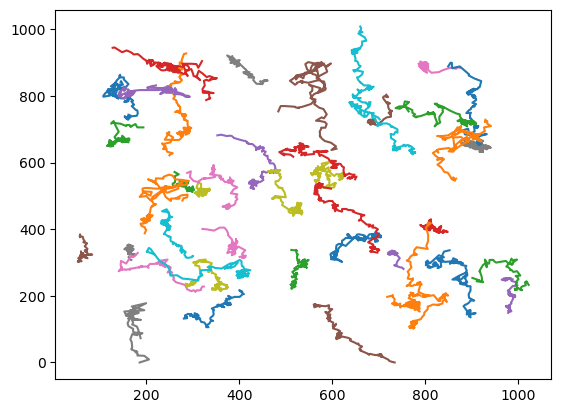

In [61]:
#Make data frame just for the coordinates
coord = pd.DataFrame(sample_data.loc[:,['Track n°','Slice n°','X','Y','Distance','Velocity']])
coord = coord.rename(columns={'Track n°': 'Track_n','Slice n°': 'Slice_n'})
#coord = pd.DataFrame(sample_data.loc[:,['Track n','Slice n','X','Y','Distance','Velocity']])
#coord = coord.rename(columns={'Track n': 'Track_n','Slice n': 'Slice_n'})

#Group coordinates by the track to which they belong
tracks = coord.groupby('Track_n')

#One graph for all the tracks, separated into the quadrants where I tracked them
fig,ax = plt.subplots()
for ID,group in tracks:
    ax.plot(group.X,group.Y)


In [62]:
##Calculate our basic motility measures

#Total Distance Traveled
tot_distance = tracks['Distance'].sum()
ave_tot_distance = tot_distance.mean()
print(ave_tot_distance)


#Average Velocity
ave_vel = tracks['Velocity'].mean().mean()
print(ave_vel)

#Total Displacement
scratch_df_max = coord.loc[coord.groupby('Track_n')['Slice_n'].idxmax()].reset_index(drop=True)
scratch_df_min = coord.loc[coord.groupby('Track_n')['Slice_n'].idxmin()].reset_index(drop=True)

X_displacement = (scratch_df_min['X']-scratch_df_max['X'])**2
Y_displacement = (scratch_df_min['Y']-scratch_df_max['Y'])**2
displacement = np.sqrt(X_displacement + Y_displacement)

mean_displacement = displacement.mean()
print(mean_displacement)

#results_df = 

890.4640227272725
8.082502877763249
126.2125742150642


In [63]:
#make reference dataframe for all the starting points of the tracks
#have to change this so that it first groups everything by the track and then gets the location of lowest slice
df_ref = sample_data.loc[sample_data.groupby('Track n°')['Slice n°'].idxmin(), ['Track n°', 'X', 'Y']]
#df_ref = sample_data.loc[sample_data.groupby('Track n')['Slice n'].idxmin(), ['Track n', 'X', 'Y']]

#df_ref = sample_data.loc[sample_data['Slice n'] == 1, ['Track n', 'X', 'Y']] #this needs to be changed to get the lowest slice instead of just slice 1
df_ref.columns = ['Track_n', 'X', 'Y']
print(df_ref)

#merge reference dataframe with sample_data on the Track_n (so that those match)
df_merge=pd.merge(coord,df_ref,
                  how ='left',
                  left_on=['Track_n'],
                  right_on=['Track_n'])
                  #suffixes=['_ref','_ref'])
print(df_merge)
df_merge.columns=['Track_n','Slice_n','X','Y','Distance','Velocity','Ref_X','Ref_Y']

#subtract the reference x and y from the actual x and y
df_merge['Norm_x'] = df_merge['X']-df_merge['Ref_X']
df_merge['Norm_y'] = df_merge['Y']-df_merge['Ref_Y']
df_merge


#FIND A WAY TO SAVE OFF THE NORMALIZED PLOTS AND I CAN COMBINE THEM LATER

#make a name

#skip up one to the directory
dir_name = os.path.dirname(file_loc)
new_file = 'df_merge' + '_' + position_title
file_name = os.path.join(dir_name,new_file)
print(file_name)

df_merge.to_csv(file_name)

      Track_n    X     Y
0           1  670   373
121         2  718   197
241         3  512   338
362         4  810   426
483         5  976   253
592         6   58   384
637         7  321   401
758         8  161   340
879         9  312   520
1000       10  250   428
1121       11  162   744
1242       12  286   928
1363       13  261   572
1484       14  128   945
1605       15  353   682
1726       16  716   804
1847       17  874   885
1968       18  897   665
2089       19  561   574
2210       20  660  1009
2331       21  852   337
2452       22  806   420
2573       23  901   254
2634       24  597   522
2755       25  753   281
2800       26  562   174
2913       27  182   329
3034       28  188    73
3111       29  298   238
3232       30  217   325
3353       31  406   213
3474       32  278   486
3595       33  194   706
3716       34  320   905
3790       35  221   832
3911       36  484   754
4032       37  288   569
4125       38  445   844
4194       39  468   574


In [64]:
#skip up one to the directory
dir_name = os.path.dirname(file_loc)
new_file = 'df_merge' + '_' + position_title
file_name = os.path.join(dir_name,new_file)
print(file_name)

Z:\Lab Huttenlocher\Ashley\Microfluidics\2023.05.22 iNeut migration\df_merge_S8


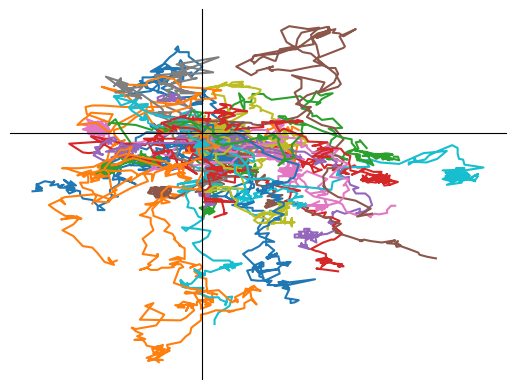

In [65]:
#Plot the normalized data
tracks_norm = df_merge.groupby('Track_n')

#set up figure axes and limits
fig,ax = plt.subplots()
#plt.xlim(-250,250)
#plt.ylim(-250,250)


#Put axes in the middle of the figure
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Hide tick marks
#ax.set_yticklabels([])
#ax.set_xticklabels([])
#ax.xaxis.set_major_locator(MultipleLocator(125))
#ax.yaxis.set_major_locator(MultipleLocator(125))
#ax.set_xticks([-700,700])
#ax.set_yticks([-700,700])
#ax.set_title(position_title)
ax.set_xticks([])
ax.set_yticks([])


#Plot based on ID of Track_n
for ID,group in tracks_norm:
    ax.plot(group.Norm_x,group.Norm_y)

